# Loading the data

data is from https://www.federalreserve.gov/econres/feds/the-us-treasury-yield-curve-1961-to-the-present.htm

## Loading full dataset

In [1]:
from __future__ import print_function, division   # Ensures Python3 printing & division standard
import pandas as pd 
from pandas import Series, DataFrame 
from matplotlib import pyplot as plt
import numpy as np

SavePlots = False

In [2]:
import pandas as pd

# Skip the first 9 rows
data = pd.read_csv('../Final-Project-AppML/feds200628.csv', skiprows=9)

# Show the first 5 rows of the resulting dataframe
data.head(5)


,Date,BETA0,BETA1,BETA2,BETA3,SVEN1F01,SVEN1F04,SVEN1F09,SVENF01,SVENF02,...,SVENY23,SVENY24,SVENY25,SVENY26,SVENY27,SVENY28,SVENY29,SVENY30,TAU1,TAU2
0,1961-06-14,3.917606,-1.277955,-1.949397,0.0,3.8067,3.9562,NaN,3.5492,3.8825,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.339218,-999.99
1,1961-06-15,3.978498,-1.257404,-2.247617,0.0,3.8694,4.0183,NaN,3.5997,3.9460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.325775,-999.99
2,1961-06-16,3.984350,-1.429538,-1.885024,0.0,3.8634,4.0242,NaN,3.5957,3.9448,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.348817,-999.99
3,1961-06-19,4.004379,-0.723311,-3.310743,0.0,3.9196,4.0447,NaN,3.6447,3.9842,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.282087,-999.99
4,1961-06-20,3.985789,-0.900432,-2.844809,0.0,3.8732,4.0257,NaN,3.5845,3.9552,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.310316,-999.99


## Raw data presentation

In [19]:
import pandas as pd

# Basic structure
print("🧾 Dataset dimensions:")
print(f"Rows: {data.shape[0]}, Columns: {data.shape[1]}\n")

print("📋 Column data types:")
print(data.dtypes)
print("\n")

# Missing values
print("🕳️ Missing values per column:")
print(data.isnull().sum())
print("\n")

# Unique values per column
print("🔢 Unique values per column:")
print(data.nunique())
print("\n")

# Summary statistics
print("📈 Summary statistics (numerical):")
print(data.describe().T)
print("\n")

# First few rows
print("🔍 First 5 rows:")
print(data.head())


🧾 Dataset dimensions:
Rows: 16673, Columns: 100

📋 Column data types:
Date       datetime64[ns]
BETA0             float64
BETA1             float64
BETA2             float64
BETA3             float64
                ...      
SVENY28           float64
SVENY29           float64
SVENY30           float64
TAU1              float64
TAU2              float64
Length: 100, dtype: object


🕳️ Missing values per column:
Date          0
BETA0       732
BETA1       732
BETA2       732
BETA3       732
           ... 
SVENY28    6823
SVENY29    6823
SVENY30    6823
TAU1        732
TAU2        732
Length: 100, dtype: int64


🔢 Unique values per column:
Date       16673
BETA0      15897
BETA1      15826
BETA2      15929
BETA3      11322
           ...  
SVENY28     9478
SVENY29     9436
SVENY30     9464
TAU1       15698
TAU2       11298
Length: 100, dtype: int64


📈 Summary statistics (numerical):
           count                           mean                  min  \
Date       16673  1993-05-27 09:

In [20]:
print("🧩 Categorical column value counts:")
for col in data.select_dtypes(include="object"):
    print(f"\nColumn: {col}")
    print(data[col].value_counts().head(5))  # Top 5 values


🧩 Categorical column value counts:


## Removing non-essential rows and columns

In [3]:
# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter rows where Date is on or after 1985-01-02
data1 = data[data['Date'] >= '1985-01-02']

# Optional: check the result
data1.head()


,Date,BETA0,BETA1,BETA2,BETA3,SVEN1F01,SVEN1F04,SVEN1F09,SVENF01,SVENF02,...,SVENY23,SVENY24,SVENY25,SVENY26,SVENY27,SVENY28,SVENY29,SVENY30,TAU1,TAU2
6145,1985-01-02,11.833172,-4.078431,-617.564405,620.832652,11.1608,12.5602,12.3404,10.1920,11.3976,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.183248,2.183435
6146,1985-01-03,11.967238,-4.169920,-617.777654,620.619446,11.1536,12.4338,12.3620,10.2197,11.3545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.181257,2.179797
6147,1985-01-04,12.049434,-4.354115,-617.725058,620.671900,11.2057,12.4703,12.4150,10.2513,11.4123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.173992,2.171873
6148,1985-01-07,11.960591,-4.299825,-617.803915,620.593354,11.1201,12.2761,12.2690,10.1968,11.3032,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.159062,2.156195
6149,1985-01-08,11.861243,-4.192519,-617.794508,620.602735,11.0820,12.2177,12.1834,10.1686,11.2611,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.142931,2.140394


In [4]:
# List of columns to keep always
cols_to_keep = ['Date', 'BETA0', 'BETA1', 'BETA2']

# Select columns that start with 'SVENPY'
svenpy_cols = [col for col in data.columns if col.startswith('SVENPY')]

# Combine all columns to keep
all_keep_cols = cols_to_keep + svenpy_cols

# Filter the dataframe to keep only these columns
data2 = data1[all_keep_cols]

# Check the result
data2.head()


,Date,BETA0,BETA1,BETA2,SVENPY01,SVENPY02,SVENPY03,SVENPY04,SVENPY05,SVENPY06,...,SVENPY21,SVENPY22,SVENPY23,SVENPY24,SVENPY25,SVENPY26,SVENPY27,SVENPY28,SVENPY29,SVENPY30
6145,1985-01-02,11.833172,-4.078431,-617.564405,9.3058,10.1846,10.7399,11.0937,11.3222,11.4724,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6146,1985-01-03,11.967238,-4.169920,-617.777654,9.3534,10.2063,10.7325,11.0636,11.2775,11.4201,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6147,1985-01-04,12.049434,-4.354115,-617.725058,9.3305,10.2187,10.7583,11.0936,11.3082,11.4508,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6148,1985-01-07,11.960591,-4.299825,-617.803915,9.2907,10.1575,10.6742,10.9906,11.1917,11.3254,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6149,1985-01-08,11.861243,-4.192519,-617.794508,9.2774,10.1326,10.6426,10.9546,11.1525,11.2833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visualization mutlidimensionally
Tries to perform PCA

In [6]:
variables = data2.columns
print(variables.values)

# benchmark_data  = data['nnbjet']
print("  Variables in data: ", variables.values)

['Date' 'BETA0' 'BETA1' 'BETA2' 'SVENPY01' 'SVENPY02' 'SVENPY03'
 'SVENPY04' 'SVENPY05' 'SVENPY06' 'SVENPY07' 'SVENPY08' 'SVENPY09'
 'SVENPY10' 'SVENPY11' 'SVENPY12' 'SVENPY13' 'SVENPY14' 'SVENPY15'
 'SVENPY16' 'SVENPY17' 'SVENPY18' 'SVENPY19' 'SVENPY20' 'SVENPY21'
 'SVENPY22' 'SVENPY23' 'SVENPY24' 'SVENPY25' 'SVENPY26' 'SVENPY27'
 'SVENPY28' 'SVENPY29' 'SVENPY30']
  Variables in data:  ['Date' 'BETA0' 'BETA1' 'BETA2' 'SVENPY01' 'SVENPY02' 'SVENPY03'
 'SVENPY04' 'SVENPY05' 'SVENPY06' 'SVENPY07' 'SVENPY08' 'SVENPY09'
 'SVENPY10' 'SVENPY11' 'SVENPY12' 'SVENPY13' 'SVENPY14' 'SVENPY15'
 'SVENPY16' 'SVENPY17' 'SVENPY18' 'SVENPY19' 'SVENPY20' 'SVENPY21'
 'SVENPY22' 'SVENPY23' 'SVENPY24' 'SVENPY25' 'SVENPY26' 'SVENPY27'
 'SVENPY28' 'SVENPY29' 'SVENPY30']


In [8]:
# Aiming to plot by components and firstly removing NaN's
# Size before removing NaNs
original_size = data2.shape[0]

# Remove rows with any NaN values
data_clean = data2.dropna()

# Size after removing NaNs
cleaned_size = data_clean.shape[0]

print(f"Original size of data2: {original_size} rows")
print(f"Size after removing NaNs (data_clean): {cleaned_size} rows")
# Removing 678 days

Original size of data2: 10528 rows
Size after removing NaNs (data_clean): 9850 rows


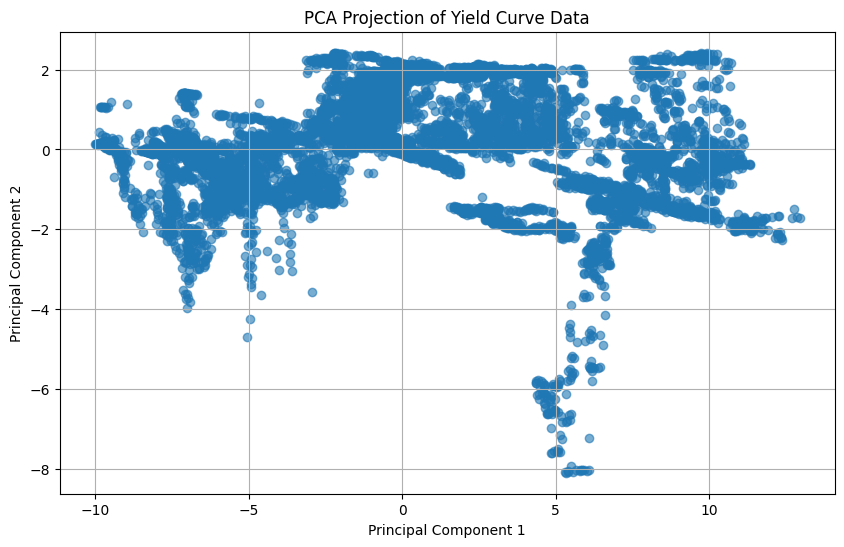

In [9]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Drop the 'Date' column (not numerical)
data_num = data_clean.drop(columns=["Date"])

# Step 2: Standardize the numerical data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_num)

# Step 3: Apply PCA to reduce to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Create a DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

# Step 5: Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df["PC1"], pca_df["PC2"], alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Yield Curve Data")
plt.grid(True)
plt.show()


2025-05-19 15:22:28.362537: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/miniconda3/envs/appml_p_25/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/miniconda3/envs/appml_p_25/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


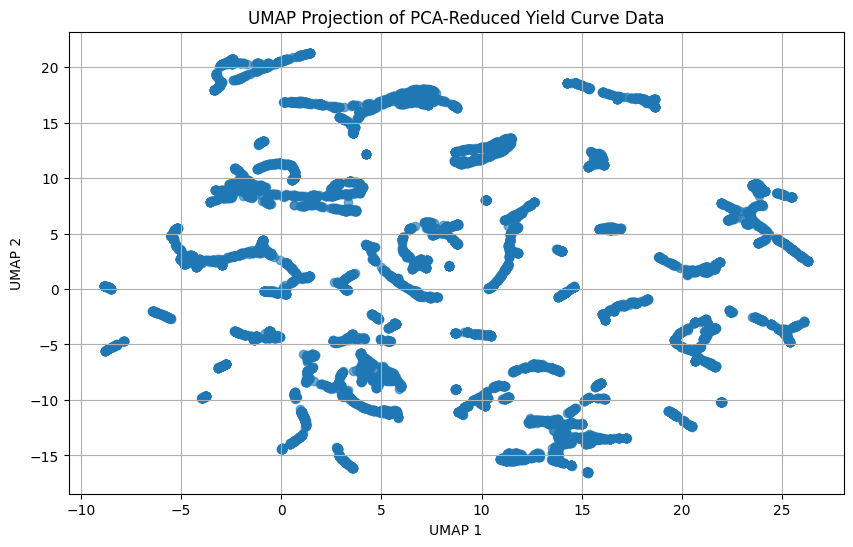

In [10]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.pyplot as plt

# Step 2: Drop non-numeric columns
X = data_clean.drop(columns=["Date"])

# Step 3: Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: PCA to 10 components (denoise and compress)
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Step 5: UMAP on PCA result
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = reducer.fit_transform(X_pca)

# Step 6: Plot UMAP projection
plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.6)
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title("UMAP Projection of PCA-Reduced Yield Curve Data")
plt.grid(True)
plt.show()


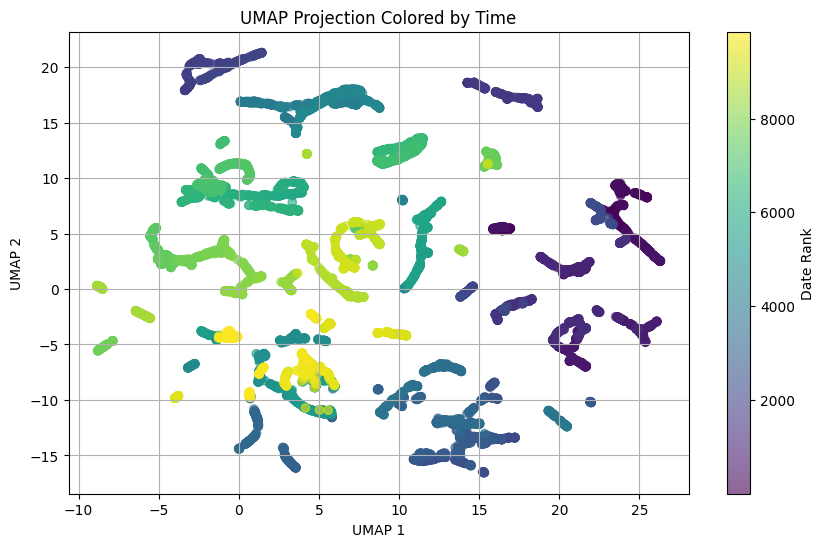

In [11]:
import matplotlib.dates as mdates

dates = pd.to_datetime(data_clean["Date"])
color = dates.rank().values  # or use dates.astype('int64') for fine-grained mapping

plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=color, cmap='viridis', alpha=0.6)
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title("UMAP Projection Colored by Time")
plt.colorbar(label="Date Rank")
plt.grid(True)
plt.show()


## Model gymnastics

In [12]:
# first guess coder
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Step 1: Prepare your data
data_clean = data2.dropna().drop(columns=["Date"])  # Drop NaNs and Date
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_clean)

# Step 2: Define autoencoder architecture
input_dim = X_scaled.shape[1]

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoder
encoded = Dense(16, activation='relu')(input_layer)
encoded = Dense(8, activation='relu')(encoded)
encoded = Dense(4, activation='relu')(encoded)  # Bottleneck

# Decoder
decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(16, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='linear')(decoded)

# Model
autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Step 3: Train the autoencoder
history = autoencoder.fit(
    X_scaled, X_scaled,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)


Epoch 1/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.7644 - val_loss: 0.1689
Epoch 2/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1031 - val_loss: 0.0656
Epoch 3/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0593 - val_loss: 0.0658
Epoch 4/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0671 - val_loss: 0.0601
Epoch 5/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0411 - val_loss: 0.0447
Epoch 6/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0189 - val_loss: 0.0378
Epoch 7/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0113 - val_loss: 0.0367
Epoch 8/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0099 - val_loss: 0.0342
Epoch 9/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0079 - val_loss: 0.0340
Epoch 10/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0075 - val_loss: 0.0327
Epoch 11/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0072 - val_loss: 0.0318
Epoch 12/50
278/278 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step

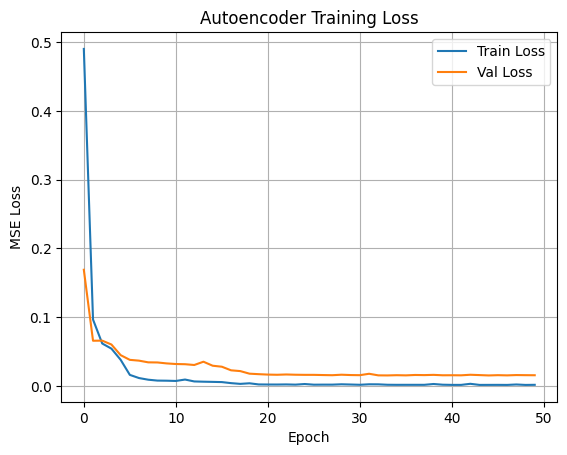

In [13]:
#Visualizing training loss
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Autoencoder Training Loss")
plt.legend()
plt.grid(True)
plt.show()


In [14]:
# Attempt to reconstruct

X_reconstructed = autoencoder.predict(X_scaled)

# Compute reconstruction error
reconstruction_error = np.mean((X_scaled - X_reconstructed)**2, axis=1)

# Optional: Flag high-error rows as anomalies
threshold = np.percentile(reconstruction_error, 95)
anomalies = reconstruction_error > threshold


308/308 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


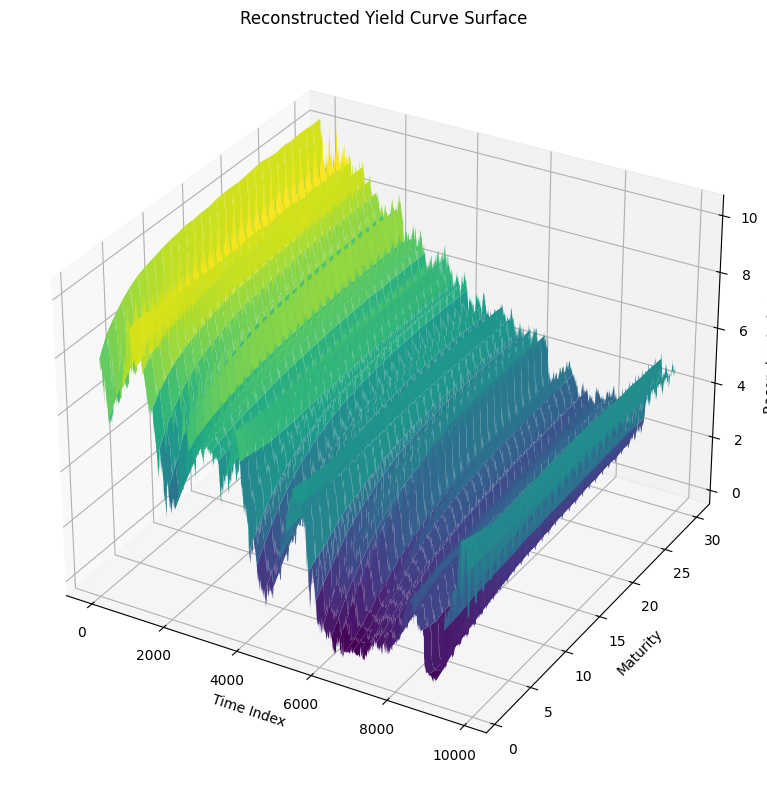

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Inverse transform to original scale
X_reconstructed_original = scaler.inverse_transform(X_reconstructed)

# Step 2: Recreate DataFrame from reconstruction
# Use the same columns that were input to the autoencoder
reconstructed_df = pd.DataFrame(X_reconstructed_original, columns=X.columns)

# Step 3: Extract maturity columns (assumes SVENPY01 to SVENPY30)
maturity_cols = [col for col in reconstructed_df.columns if col.startswith("SVENPY")]
maturity_cols_sorted = sorted(maturity_cols, key=lambda x: int(x.replace("SVENPY", "")))

# Step 4: Create meshgrid for plotting
X_time = np.arange(len(reconstructed_df))  # Use row index as time
Y_maturities = np.array([int(col.replace("SVENPY", "")) for col in maturity_cols_sorted])
Z_yields = reconstructed_df[maturity_cols_sorted].values

X_mesh, Y_mesh = np.meshgrid(X_time, Y_maturities, indexing='ij')

# Step 5: Plot 3D surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X_mesh, Y_mesh, Z_yields, cmap='viridis')

ax.set_xlabel('Time Index')
ax.set_ylabel('Maturity')
ax.set_zlabel('Reconstructed Yield')
ax.set_title('Reconstructed Yield Curve Surface')

plt.tight_layout()
plt.show()

## VAE attempt

In [ ]:
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse
import tensorflow.keras.backend as K
import numpy as np

# Input layer
input_dim = X_scaled.shape[1]
latent_dim = 2  # You want 2D latent space

inputs = Input(shape=(input_dim,))
h = Dense(32, activation='relu')(inputs)
h = Dense(16, activation='relu')(h)

# Latent mean and log variance
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

# Reparameterization trick
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=K.shape(z_mean), mean=0., stddev=1.)
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling)([z_mean, z_log_var])

# Decoder
decoder_h = Dense(16, activation='relu')
decoder_h2 = Dense(32, activation='relu')
decoder_mean = Dense(input_dim, activation='linear')

h_decoded = decoder_h(z)
h_decoded = decoder_h2(h_decoded)
x_decoded_mean = decoder_mean(h_decoded)

# Define VAE model
vae = Model(inputs, x_decoded_mean)

# VAE loss: reconstruction + KL divergence
reconstruction_loss = mse(inputs, x_decoded_mean) * input_dim
kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=1)
vae_loss = K.mean(reconstruction_loss + kl_loss)

vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

# Train the VAE
vae.fit(X_scaled, epochs=50, batch_size=32, validation_split=0.1, verbose=1)


## Yahoo Finance import

In [2]:
#Only closing
import yfinance as yf
import datetime

# Define the ticker symbol (example: Microsoft)
ticker_symbol = "^GSPC"

# Define the date range
start_date = "1981-02-01"
end_date = datetime.datetime.today().strftime('%Y-%m-%d')

# Download the historical daily stock data
data = yf.download(ticker_symbol, start=start_date, end=end_date, interval="1d")

# Display the first few rows
print(data.head())

# Save to CSV (optional)
data.to_csv(f"{ticker_symbol}_daily_{start_date}_to_{end_date}.csv")


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low  Open    Volume
Ticker           ^GSPC       ^GSPC       ^GSPC ^GSPC     ^GSPC
Date                                                          
1981-02-02  126.910004  129.479996  125.820000   0.0  44070000
1981-02-03  128.460007  128.919998  125.889999   0.0  45950000
1981-02-04  128.589996  129.710007  127.290001   0.0  45520000
1981-02-05  129.630005  130.490005  127.989998   0.0  45320000
1981-02-06  130.600006  131.809998  129.029999   0.0  45820000


In [7]:
#OHLC data
import yfinance as yf
import mplfinance as mpf
import datetime

# Set ticker and date range
ticker = "^GSPC"
start_date = "1985-01-02"
end_date = datetime.datetime.today().strftime('%Y-%m-%d')

# Download historical data
data = yf.download(ticker, start=start_date, end=end_date, interval="1d")

# Save to CSV
data.to_csv("SP_historic.csv")

[*********************100%***********************]  1 of 1 completed


In [8]:
#OHLC data
import yfinance as yf
import mplfinance as mpf
import datetime

# Set ticker and date range
ticker = "^NYOMFFX"
start_date = "1991-01-09"
end_date = datetime.datetime.today().strftime('%Y-%m-%d')

# Download historical data
data = yf.download(ticker, start=start_date, end=end_date, interval="1d")

# Save to CSV
data.to_csv("FED_historic.csv")



[*********************100%***********************]  1 of 1 completed

1 Failed download:
['^NYOMFFX']: YFInvalidPeriodError("^NYOMFFX: Period 'max' is invalid, must be of the format 1d, 5d, etc.")


In [28]:
import pandas as pd

# Load nodecision data
nodecision = pd.read_csv("FED_interest_rate_nodecision.csv")
nodecision["observation_date"] = pd.to_datetime(nodecision["observation_date"], format="%Y-%m-%d")
nodecision.rename(columns={"observation_date": "Date"}, inplace=True)

# Create full daily date range
date_range = pd.DataFrame({"Date": pd.date_range(start="1991-01-01", end=pd.Timestamp.today())})
nodecision_daily = pd.merge(date_range, nodecision, on="Date", how="left")

# Forward-fill interest rate values
nodecision_daily["FEDFUNDS"] = nodecision_daily["FEDFUNDS"].ffill()

# Load decision data
decision = pd.read_csv("FED_interest_rate_decision.csv")
decision.rename(columns={decision.columns[0]: "Date"}, inplace=True)

# ✅ Convert Date column in decision to datetime
decision["Date"] = pd.to_datetime(decision["Date"], format="%Y-%m-%d")

# Merge decision info onto daily data
combined = pd.merge(nodecision_daily, decision, on="Date", how="left")

# Save result
combined.to_csv("FED_interest.csv", index=False)
print(combined.head(50))


         Date  FEDFUNDS  Notes Rate Change (bps)  Target Rate (%)
0  1991-01-01      6.91    NaN               NaN              NaN
1  1991-01-02      6.91    NaN               NaN              NaN
2  1991-01-03      6.91    NaN               NaN              NaN
3  1991-01-04      6.91    NaN               NaN              NaN
4  1991-01-05      6.91    NaN               NaN              NaN
5  1991-01-06      6.91    NaN               NaN              NaN
6  1991-01-07      6.91    NaN               NaN              NaN
7  1991-01-08      6.91    NaN               NaN              NaN
8  1991-01-09      6.91    0.0               -25             6.75
9  1991-01-10      6.91    0.0                 0             6.75
10 1991-01-11      6.91    0.0                 0             6.75
11 1991-01-12      6.91    0.0                 0             6.75
12 1991-01-13      6.91    0.0                 0             6.75
13 1991-01-14      6.91    0.0                 0             6.75
14 1991-01

In [37]:
# Example dataset with NA values
df = pd.read_csv('FED_interest.csv')

# Fill NA values with 0
df_filled = df.fillna(0)

# Write to CSV file
df_filled.to_csv("FED_interest.csv", index=False)


## Import swaps



In [31]:
# Just one file

import pandas as pd

# Load the Excel file (adjust filename as needed)
file_path = "SwapData/BloombergData/ad/ad1year.xlsx"

# Step 1: Read cell A7 and B1 for column names
header_info = pd.read_excel(file_path, header=None, nrows=7)

date_col_name = header_info.iloc[6, 0]  # A7
value_col_name = header_info.iloc[0, 1]  # B1

# Step 2: Read actual data from row 8 onward (zero-indexed: skiprows=7)
df = pd.read_excel(file_path, usecols="A:B", skiprows=7, header=None)
df.columns = ["Date", value_col_name]  # Rename columns

# Optional: parse dates
df["Date"] = pd.to_datetime(df["Date"])

# Preview
print(df.head())

        Date  ADSW1 BGN Curncy
0 2024-02-29           4.39875
1 2024-01-31           4.25980
2 2023-12-29           4.33610
3 2023-11-30           4.64000
4 2023-10-31           4.86820


In [49]:
# By folder
import pandas as pd
import os

# Path to your folder with 9 Excel files
folder_path = "SwapData/TestData/jy"  # ← change this

# List all Excel files in the folder
files = [f for f in os.listdir(folder_path) if f.endswith(".xlsx") or f.endswith(".xls")]

# Initialize empty list to collect each DataFrame
dfs = []

# Process each file
for file in files:
    full_path = os.path.join(folder_path, file)
    
    # Read metadata for column names
    header_info = pd.read_excel(full_path, header=None, nrows=7, usecols="A,B")
    date_col_name = "Date"  # from A7
    value_col_name = header_info.iloc[0, 1]  # from B1

    # Read actual data (from row 8)
    df = pd.read_excel(full_path, usecols="A,B", skiprows=7, header=None)
    df.columns = [date_col_name, value_col_name]
    df[date_col_name] = pd.to_datetime(df[date_col_name])

    # Store in list
    dfs.append(df)

# Merge all DataFrames on "Date"
from functools import reduce

merged_df = reduce(lambda left, right: pd.merge(left, right, on="Date", how="outer"), dfs)

# Sort by date (optional)
merged_df = merged_df.sort_values("Date").reset_index(drop=True)

# Preview
print(merged_df.head())

# Save to CSV
merged_df.to_csv("jy.csv", index=False)



        Date  JYSO3 BGN Curncy  JYSO2 BGN Curncy  JYSO5 BGN Curncy  \
0 2004-05-31               NaN               NaN               NaN   
1 2004-06-30               NaN               NaN               NaN   
2 2004-07-30               NaN               NaN               NaN   
3 2004-08-31               NaN               NaN               NaN   
4 2004-09-30               NaN               NaN               NaN   

   JYSO10 BGN Curncy  JYSO15 BGN Curncy  JYSO1 BGN Curncy  JYSO20 BGN Curncy  \
0                NaN                NaN             0.030                NaN   
1                NaN                NaN             0.065                NaN   
2                NaN                NaN             0.030                NaN   
3                NaN                NaN             0.048                NaN   
4                NaN                NaN             0.048                NaN   

   JYSO30 BGN Curncy  
0                NaN  
1                NaN  
2                NaN  
3     

In [38]:
import pandas as pd
import os
from pathlib import Path
from functools import reduce

# Set your top-level folder path
root_folder = "SwapData/TestData/"  # <-- change this

# Collect all Excel files recursively
all_files = list(Path(root_folder).rglob("*.xlsx"))

# Store all partial DataFrames
dataframes = []

for file in all_files:
    try:
        # Read header cells
        header = pd.read_excel(file, header=None, nrows=7, usecols="A,B")
        date_col_name = "Date"
        value_col_name = header.iloc[0, 1]  # B1 cell value

        # Read data from row 8 onward
        df = pd.read_excel(file, skiprows=7, usecols="A,B", header=None)
        df.columns = [date_col_name, value_col_name]

        # Ensure datetime format
        df[date_col_name] = pd.to_datetime(df[date_col_name])

        # Append to list
        dataframes.append(df)

    except Exception as e:
        print(f"⚠️ Failed to process file: {file}")
        print(e)

# Merge all DataFrames on Date (outer join keeps all dates)
merged_df = reduce(lambda left, right: pd.merge(left, right, on="Date", how="outer"), dataframes)

# Sort by Date
merged_df = merged_df.sort_values("Date").reset_index(drop=True)

# Optional: Save to file
merged_df.to_csv("all_merged_data.csv", index=False)

# Preview
print(merged_df.head())




⚠️ Failed to process file: SwapData/TestData/sw/~$sw15year.xlsx
Excel file format cannot be determined, you must specify an engine manually.
        Date  SKSW20 BGN Curncy  SKSW15 BGN Curncy  SKSW1 BGN Curncy  \
0 2004-05-31              5.355             5.2550            2.5625   
1 2004-06-30              5.340             5.2200            2.6300   
2 2004-07-30              5.255             5.1350            2.5925   
3 2004-08-31              5.110             4.9850            2.6150   
4 2004-09-30              4.990             4.8625            2.6800   

   SKSW30 BGN Curncy  SKSW3 BGN Curncy  SKSW2 BGN Curncy  SKSW10 BGN Curncy  \
0              5.435            3.6575            3.1750             5.0250   
1              5.400            3.7300            3.2600             5.0200   
2              5.305            3.6300            3.1600             4.9050   
3              5.195            3.5625            3.1200             4.7450   
4              5.030           

## Data

In [108]:
import pandas as pd
data = pd.read_csv('../Final-Project-AppML/feds200628.csv', skiprows=9)

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter rows where Date is on or after 1985-01-02
data1 = data[data['Date'] >= '1985-01-02']

# List of columns to keep always
cols_to_keep = ['Date', 'BETA0', 'BETA1', 'BETA2']

# Select columns that start with 'SVENY'
sveny_cols = [col for col in data.columns if col.startswith('SVENY')]

# Combine all columns to keep
all_keep_cols = cols_to_keep + sveny_cols

# Filter the dataframe to keep only these columns
data2 = data1[all_keep_cols]

# Drop SVENY21 to SVENY30 from data2
columns_to_drop = [f'SVENY{i}' for i in range(21, 31)]
data2 = data2.drop(columns=columns_to_drop, errors='ignore')

# Skip the first two rows, but manually set row 2 (i.e. 0-based row index 2) as header
SP_500_historic = pd.read_csv('../Final-Project-AppML/SP_historic.csv', skiprows=2, header=0)

# Now 'Date' should be in ISO format already, so you can parse it without specifying a format
SP_500_historic['Date'] = pd.to_datetime(SP_500_historic['Date'])

# If you want it as 'YYYY-MM-DD' string format
SP_500_historic['Date'] = SP_500_historic['Date'].dt.strftime('%Y-%m-%d')

# Preview
SP_500_historic.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Skip the first 9 rows
fed_interest = pd.read_csv('../Final-Project-AppML/FED_interest.csv')

# Ensure both Date columns are datetime
data2['Date'] = pd.to_datetime(data2['Date'])
SP_500_historic['Date'] = pd.to_datetime(SP_500_historic['Date'])
fed_interest['Date'] = pd.to_datetime(fed_interest['Date'])

# Now do the merge
data_w_SP = pd.merge(data2, SP_500_historic, on='Date', how='left')

data_w_SP = pd.merge(data_w_SP, fed_interest, on='Date', how='left')

# Ensure 'Date' is in datetime format
data_w_SP['Date'] = pd.to_datetime(data_w_SP['Date'])

# Filter by date
data_w_SP = data_w_SP[data_w_SP['Date'] >= '1991-01-09']

# Drop BETA columns and 'Target Rate (%)' column
data_w_SP = data_w_SP.loc[:, ~data_w_SP.columns.str.startswith('BETA')]
data_w_SP = data_w_SP.drop(columns='Target Rate (%)', errors='ignore')
#data_w_SP = data_w_SP.drop(columns='Notes', errors='ignore') # Forlæng
#data_w_SP = data_w_SP.drop(columns='Rate Change (bps)', errors='ignore') #Forlæng

# Convert 'Notes' and 'Rate Change (bps)' to integers, if they exist
for col in ['Notes', 'Rate Change (bps)']:
    if col in data_w_SP.columns:
        data_w_SP[col] = pd.to_numeric(data_w_SP[col], errors='coerce').astype('Int64')  # Nullable integer type


In [109]:
df = data_w_SP.dropna()

## Predicting FED decisions

### Neural network w/o lags

In [120]:
split_date = pd.Timestamp('2025-01-01')

train_data = df[df['Date'] < split_date]
test_data = df[df['Date'] >= split_date]

target = 'Rate Change (bps)'

In [112]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Training/validation 80/20 split
test_split_date = pd.Timestamp('2018-01-01')

# Split into training and validation sets
train_df = train_data[train_data["Date"] < test_split_date]
val_df = train_data[train_data["Date"] >= test_split_date]

# Define features and target
feature_cols = [col for col in train_data.columns if col not in ["Date", target]]

# Datasplit
X_train = train_df[feature_cols]
y_train = train_df[target]

X_val = val_df[feature_cols]
y_val = val_df[target]

In [129]:
# Convert target to float32
y_train = y_train.astype(np.float32)
y_val = y_val.astype(np.float32)

# Step 1: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Step 2: Build the regression neural network model
reg_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # No activation for regression
])

# Step 3: Compile the model for regression
reg_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='mean_squared_error',   # Use MSE for regression
                  metrics=['mean_absolute_error'])

# Step 4: Train the model
reg_history = reg_model.fit(X_train_scaled, y_train,
                            validation_data=(X_val_scaled, y_val),
                            epochs=50,
                            batch_size=32,
                            verbose=1)



/opt/miniconda3/envs/appml_p_25/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 12.7444 - mean_absolute_error: 0.5074 - val_loss: 24.1089 - val_mean_absolute_error: 0.9680
Epoch 2/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 13.1010 - mean_absolute_error: 0.4933 - val_loss: 24.3003 - val_mean_absolute_error: 0.8435
Epoch 3/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 16.3575 - mean_absolute_error: 0.5878 - val_loss: 24.6319 - val_mean_absolute_error: 0.6906
Epoch 4/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 14.4411 - mean_absolute_error: 0.5364 - val_loss: 25.2889 - val_mean_absolute_error: 1.0894
Epoch 5/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 13.2404 - mean_absolute_error: 0.5834 - val_loss: 25.5009 - val_mean_absolute_error: 1.2879
Epoch 6/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 12.0217 - mean_absolute_error: 0.5518 - val_loss: 25.5091 - val_mean_absolute_error: 0.8409
Epoch 7/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 12.4528 - mean_absolute_er

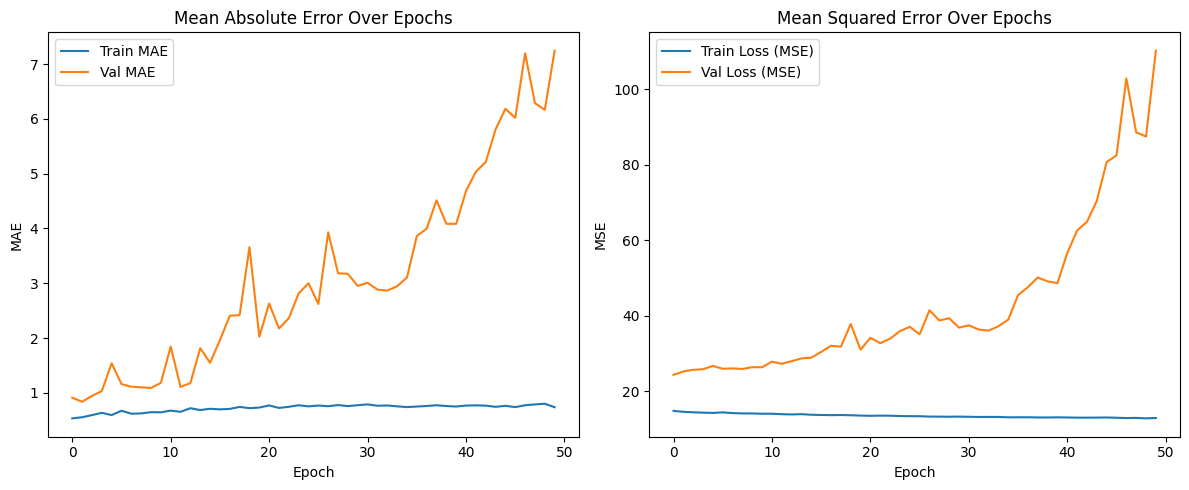

In [115]:
# Step 5: Plot training & validation performance
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(reg_history.history['mean_absolute_error'], label='Train MAE')
plt.plot(reg_history.history['val_mean_absolute_error'], label='Val MAE')
plt.title('Mean Absolute Error Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(reg_history.history['loss'], label='Train Loss (MSE)')
plt.plot(reg_history.history['val_loss'], label='Val Loss (MSE)')
plt.title('Mean Squared Error Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


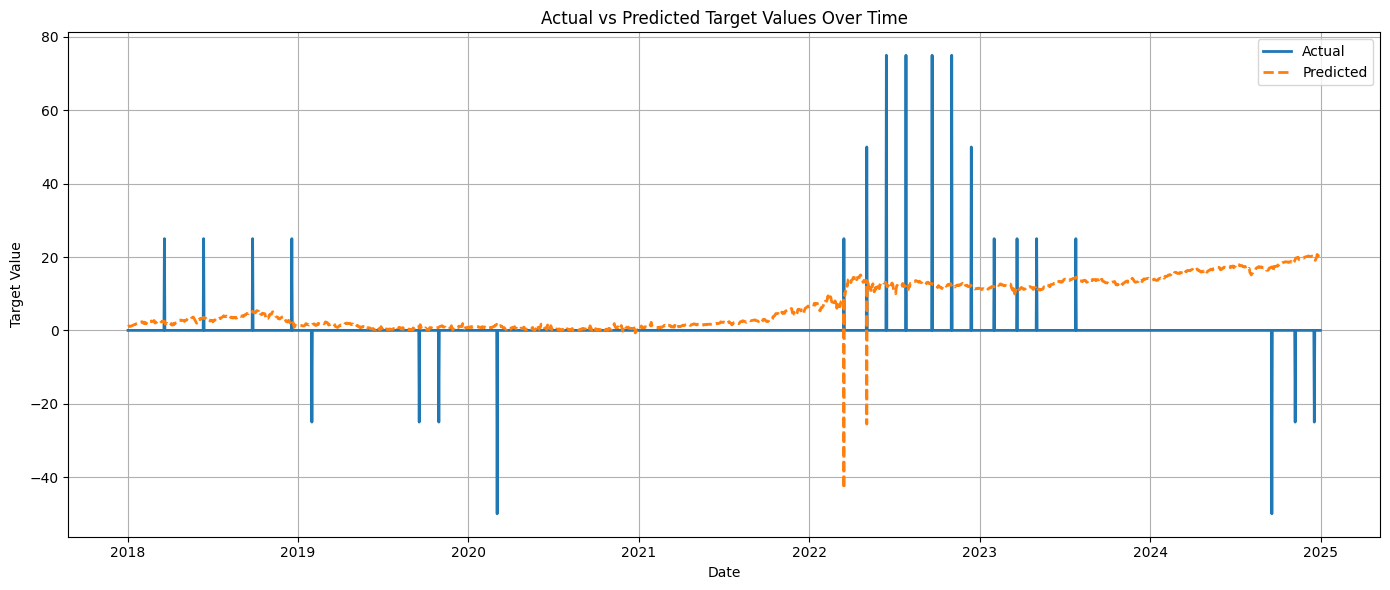

In [118]:
# Make predictions on the validation set
y_pred = reg_model.predict(X_val_scaled)

# Flatten to 1D array (optional, for compatibility)
y_pred = y_pred.flatten()

# Extract the date column from the validation dataframe
dates = val_df["Date"]

# Plot actual vs predicted values over time
plt.figure(figsize=(14, 6))
plt.plot(dates, y_val.values, label='Actual', linewidth=2)
plt.plot(dates, y_pred, label='Predicted', linewidth=2, linestyle='--')
plt.xlabel('Date')
plt.ylabel('Target Value')
plt.title('Actual vs Predicted Target Values Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [75]:
import numpy as np

diff = np.abs(y_val - y_pred.flatten())
print("Mean absolute difference:", np.mean(diff))
print("Max absolute difference:", np.max(diff))


Mean absolute difference: 0.8768122586055517
Max absolute difference: 75.17303454875946


### Neural network w lags

In [121]:
# Introducing lags
train_lag_data = train_data

# Assume you want to add 3 lags of the target variable
for lag in [1, 2, 3]:
    train_lag_data[f'target_lag_{lag}'] = train_lag_data[target].shift(lag)

# Drop rows with NaNs created by shift
train_lag_data.dropna(inplace=True)

# Redefine training/validation sets with lag features included
train_lag_df = train_lag_data[train_lag_data["Date"] < test_split_date]
val_lag_df = train_lag_data[train_lag_data["Date"] >= test_split_date]

feature_cols = [col for col in train_lag_data.columns if col not in ["Date", target]]

/var/folders/8c/w39xd3gn6wv4b9j9zrk1xqbw0000gn/T/ipykernel_4090/3091328626.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_lag_data[f'target_lag_{lag}'] = train_lag_data[target].shift(lag)
/var/folders/8c/w39xd3gn6wv4b9j9zrk1xqbw0000gn/T/ipykernel_4090/3091328626.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_lag_data[f'target_lag_{lag}'] = train_lag_data[target].shift(lag)
/var/folders/8c/w39xd3gn6wv4b9j9zrk1xqbw0000gn/T/ipykernel_4090/3091328626.py:5: SettingWithCopyWarning: 
A value 

In [127]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Datasplit
X_train_lag = train_lag_df[feature_cols]
y_train_lag = train_lag_df[target]

X_val_lag = val_lag_df[feature_cols]
y_val_lag = val_lag_df[target]

# Convert target to float32
y_train_lag = y_train_lag.astype(np.float32)
y_val_lag = y_val_lag.astype(np.float32)

# Step 1: Standardize the features
scaler = StandardScaler()
X_train_lag_scaled = scaler.fit_transform(X_train_lag)
X_val_lag_scaled = scaler.transform(X_val_lag)

# Step 2: Build the regression neural network model
reg_model_lag = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_lag.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # No activation for regression
])

# Step 3: Compile the model for regression
reg_model_lag.compile(optimizer=Adam(learning_rate=0.001),
                  loss='mean_squared_error',   # Use MSE for regression
                  metrics=['mean_absolute_error'])

# Step 4: Train the model
reg_history_lag = reg_model_lag.fit(X_train_lag_scaled, y_train_lag,
                            validation_data=(X_val_lag_scaled, y_val_lag),
                            epochs=50,
                            batch_size=32,
                            verbose=1)

/opt/miniconda3/envs/appml_p_25/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - loss: 15.2387 - mean_absolute_error: 0.6020 - val_loss: 23.8955 - val_mean_absolute_error: 0.8490
Epoch 2/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 12.5304 - mean_absolute_error: 0.4954 - val_loss: 24.5146 - val_mean_absolute_error: 0.6449
Epoch 3/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 12.9885 - mean_absolute_error: 0.4902 - val_loss: 24.8621 - val_mean_absolute_error: 0.9146
Epoch 4/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 15.8633 - mean_absolute_error: 0.5900 - val_loss: 25.2307 - val_mean_absolute_error: 0.6243
Epoch 5/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 11.1086 - mean_absolute_error: 0.5161 - val_loss: 25.7275 - val_mean_absolute_error: 1.0816
Epoch 6/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 15.5142 - mean_absolute_error: 0.6556 - val_loss: 25.8587 - val_mean_absolute_error: 1.1607
Epoch 7/50
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 13.4143 - mean_absolute_er

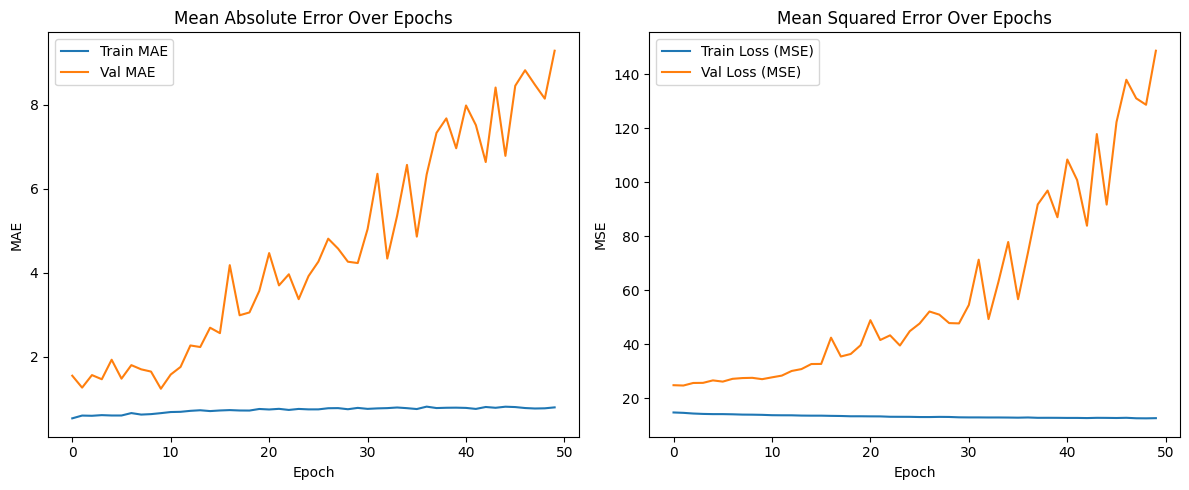

In [125]:
# Step 5: Plot training & validation performance
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(reg_history_lag.history['mean_absolute_error'], label='Train MAE')
plt.plot(reg_history_lag.history['val_mean_absolute_error'], label='Val MAE')
plt.title('Mean Absolute Error Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(reg_history_lag.history['loss'], label='Train Loss (MSE)')
plt.plot(reg_history_lag.history['val_loss'], label='Val Loss (MSE)')
plt.title('Mean Squared Error Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()

55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


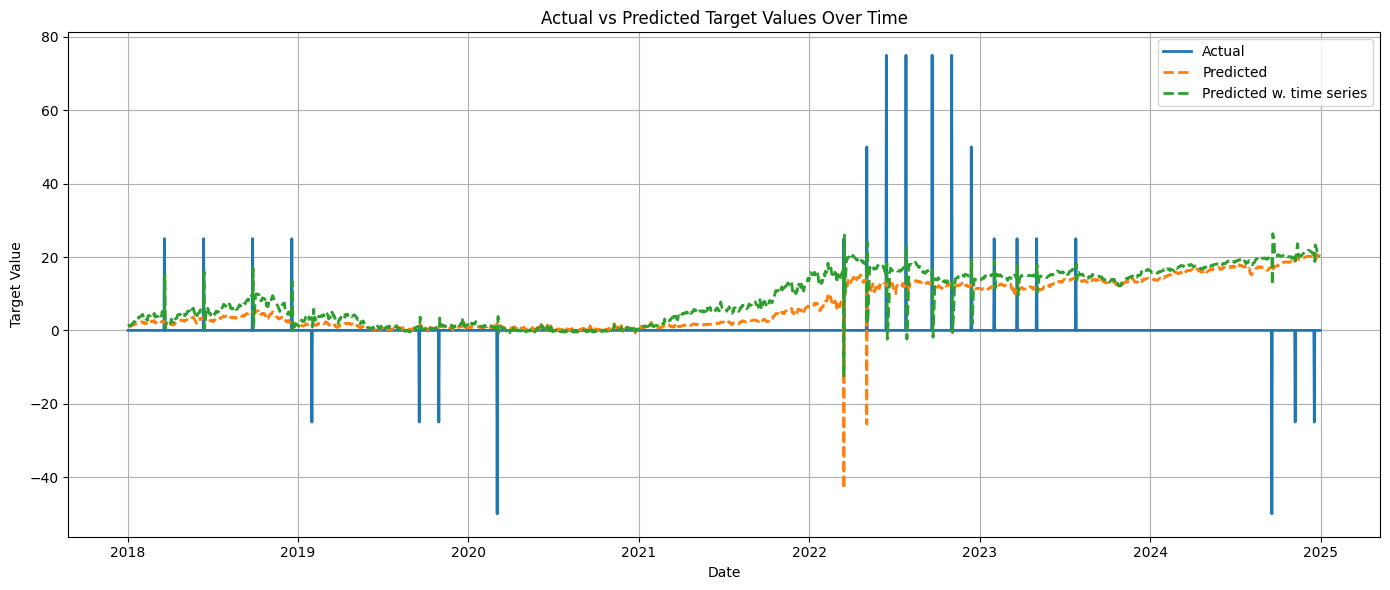

In [124]:
# Make predictions on the validation set
y_pred_lag = reg_model_lag.predict(X_val_scaled)

# Flatten to 1D array (optional, for compatibility)
y_pred_lag = y_pred_lag.flatten()

# Extract the date column from the validation dataframe
dates = val_lag_df["Date"]

# Plot actual vs predicted values over time
plt.figure(figsize=(14, 6))
plt.plot(dates, y_val.values, label='Actual', linewidth=2)
plt.plot(dates, y_pred, label='Predicted', linewidth=2, linestyle='--')
plt.plot(dates, y_pred_lag, label='Predicted w. time series', linewidth=2, linestyle='--')
plt.xlabel('Date')
plt.ylabel('Target Value')
plt.title('Actual vs Predicted Target Values Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [132]:
from sklearn.metrics import mean_absolute_error

# Predict on validation set
y_pred = reg_model.predict(X_val_scaled).flatten()
y_pred_lag = reg_model_lag.predict(X_val_lag_scaled).flatten()

# Calculate MAE
mae_val = mean_absolute_error(y_val, y_pred)
mae_val_lag = mean_absolute_error(y_val_lag, y_pred_lag)

print(f"Validation MAE: {mae_val:.4f}")
print(f"Validation MAE w. time series: {mae_val_lag:.4f}")


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Validation MAE: 4.6183
Validation MAE w. time series: 10.5295


## Predicting interest rate


### XGBoost: stock data, FED meetings and not time series 

In [ ]:
print(data_w_SP.head(10))
print("Column names:", data_w_SP.columns.tolist())

           Date   SVENY01   SVENY02   SVENY03   SVENY04   SVENY05   SVENY06  \
1570 1991-01-09  6.841287  7.133531  7.389677  7.613145  7.807043  7.974199   
1571 1991-01-10  6.799324  7.089104  7.339749  7.555624  7.740626  7.898230   
1572 1991-01-11  6.773037  7.085764  7.351627  7.576813  7.766714  7.926027   
1573 1991-01-14  6.777678  7.110425  7.385916  7.613962  7.802602  7.958424   
1574 1991-01-15  6.752939  7.099241  7.371627  7.591270  7.772313  7.924163   
1575 1991-01-16  6.792056  7.156312  7.421302  7.627785  7.798035  7.943830   
1576 1991-01-17  6.808985  7.122995  7.347866  7.526553  7.673935  7.796870   
1577 1991-01-18  6.791290  7.085986  7.307488  7.493435  7.651070  7.784046   
1578 1991-01-21       NaN       NaN       NaN       NaN       NaN       NaN   
1579 1991-01-22  6.728230  7.063404  7.309689  7.507740  7.671806  7.808864   

       SVENY07   SVENY08   SVENY09  ...   SVENY17   SVENY18   SVENY19  \
1570  8.117182  8.238325  8.339752  ...  8.639320  8.6318

In [ ]:
split_date = pd.Timestamp('2025-01-01')

train_data = data_w_SP[data_w_SP['Date'] < split_date]
test_data = data_w_SP[data_w_SP['Date'] >= split_date]

target = 'FEDFUNDS'

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import time
import pandas as pd

# Drop rows with any missing values from train and test first
train_data_clean = train_data.dropna()
test_data_clean = test_data.dropna()

# Select all except target
feature_cols = [col for col in data_w_SP.columns if col not in [target, "Date"]]


# Prepare features and target after drop,ping NA rows
X_train = train_data_clean[feature_cols]
Y_train = train_data_clean[target]

X_test = test_data_clean[feature_cols]
Y_test = test_data_clean[target]

# Start timer
start = time.time()

# Create DMatrices for XGBoost
dtrain = xgb.DMatrix(X_train, label=Y_train)
dvalid = xgb.DMatrix(X_test, label=Y_test)

# XGBoost parameters
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'eval_metric': 'mae',
    'verbosity': 0
}

evals = [(dtrain, 'train'), (dvalid, 'eval')]

# Train model with early stopping
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=False
)

# Predict and evaluate
y_pred_rate = xgb_model.predict(dvalid, iteration_range=(0, xgb_model.best_iteration + 1))
mae = mean_absolute_error(Y_test, y_pred_rate)
relative_mae = mae / abs(Y_test).mean()

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Relative MAE: {relative_mae:.4f}")
print(f"Time used by XGBoost: {(time.time() - start) * 1000:.1f} ms")

Mean Absolute Error: 0.1253
Relative MAE: 0.0289
Time used by XGBoost: 2673.3 ms


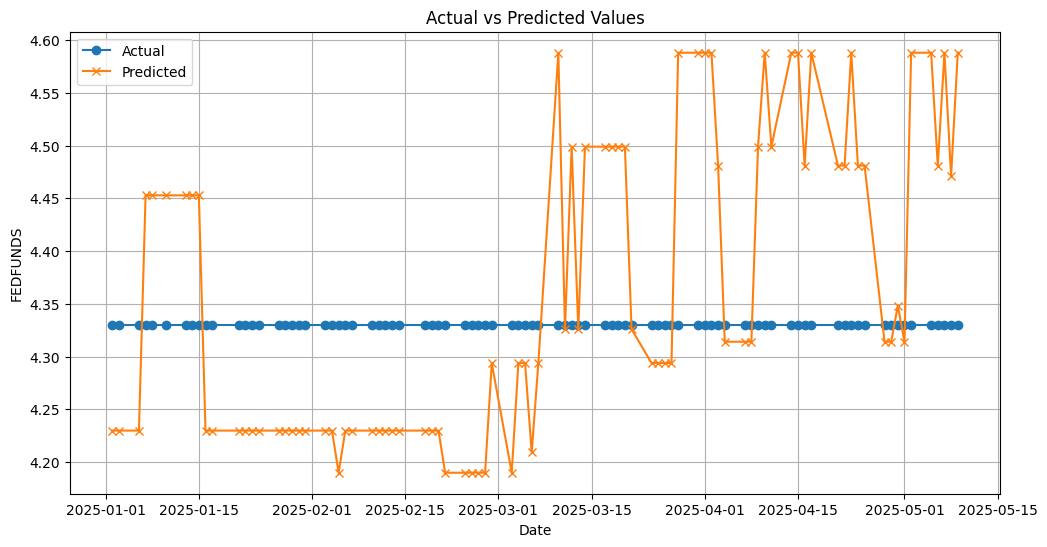

In [ ]:
import matplotlib.pyplot as plt

# Assuming you still have test_data_clean (with dropped NAs) and predictions y_pred

# Make predictions
y_pred_rate = xgb_model.predict(dvalid, iteration_range=(0, xgb_model.best_iteration + 1))

# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(test_data_clean['Date'], Y_test, label='Actual', marker='o')
plt.plot(test_data_clean['Date'], y_pred_rate, label='Predicted', marker='x')
#plt.plot(test_data_clean['Date'], y_pred_ZCB, label='Predicted w. ZCB data', marker='x')
#plt.plot(test_data_clean['Date'], y_pred_stock, label='Predicted w. stock data', marker='x')
plt.xlabel('Date')
plt.ylabel(target)
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


### XGBoost: stock data, FED meetings and time series 

In [ ]:
# Example: use data before a date for training, after that date for testing

split_date = pd.Timestamp('2025-01-01')

train_data = data_w_SP[data_w_SP['Date'] < split_date]
test_data = data_w_SP[data_w_SP['Date'] >= split_date]

target = 'FEDFUNDS'



In [ ]:
def create_lags(df, target_col, lags=[1,2,3]):
    df = df.copy()
    for lag in lags:
        df[f'{target_col}_lag{lag}'] = df[target_col].shift(lag)
    return df

train_data = create_lags(train_data, target)
test_data = create_lags(test_data, target)

# Drop NA rows caused by shifting lags
train_data = train_data.dropna()
test_data = test_data.dropna()

X_train = train_data.drop(columns=[target, 'Date'])
Y_train = train_data[target]
X_test = test_data.drop(columns=[target, 'Date'])
Y_test = test_data[target]

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import time

start = time.time()

dtrain = xgb.DMatrix(X_train, label=Y_train)
dvalid = xgb.DMatrix(X_test, label=Y_test)

params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'eval_metric': 'mae',
    'verbosity': 0
}

evals = [(dtrain, 'train'), (dvalid, 'eval')]
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=False
)

y_pred_rate_time = xgb_model.predict(dvalid, iteration_range=(0, xgb_model.best_iteration + 1))
mae = mean_absolute_error(Y_test, y_pred_rate_time)

mean_abs_actual = abs(Y_test).mean()
relative_mae = mae / mean_abs_actual

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Relative MAE: {relative_mae:.4f}")
print(f"Time used by XGBoost: {(time.time() - start) * 1000:.1f} ms")


Mean Absolute Error: 0.0024
Relative MAE: 0.0005
Time used by XGBoost: 3459.5 ms


ValueError: x and y must have same first dimension, but have shapes (86,) and (88,)

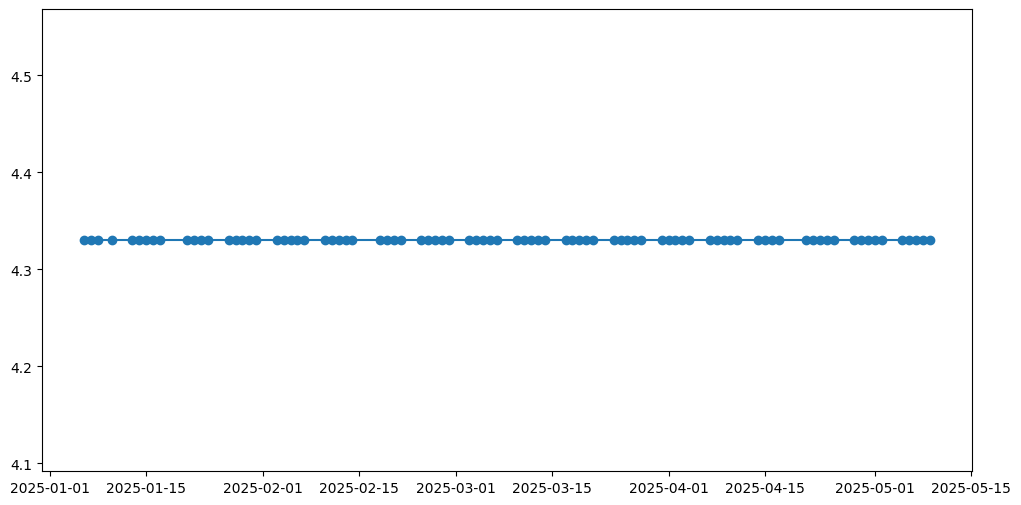

In [ ]:
import matplotlib.pyplot as plt

# Assuming you still have test_data_clean (with dropped NAs) and predictions y_pred

# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(test_data['Date'], Y_test, label='Actual', marker='o')
#plt.plot(test_data['Date'], y_pred_rate, label='Predicted', marker='x')
plt.plot(test_data['Date'], y_pred_rate_time, label='Predicted w. lags', marker='x')
#plt.plot(test_data_clean['Date'], y_pred_stock, label='Predicted w. stock data', marker='x')
plt.xlabel('Date')
plt.ylabel(target)
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


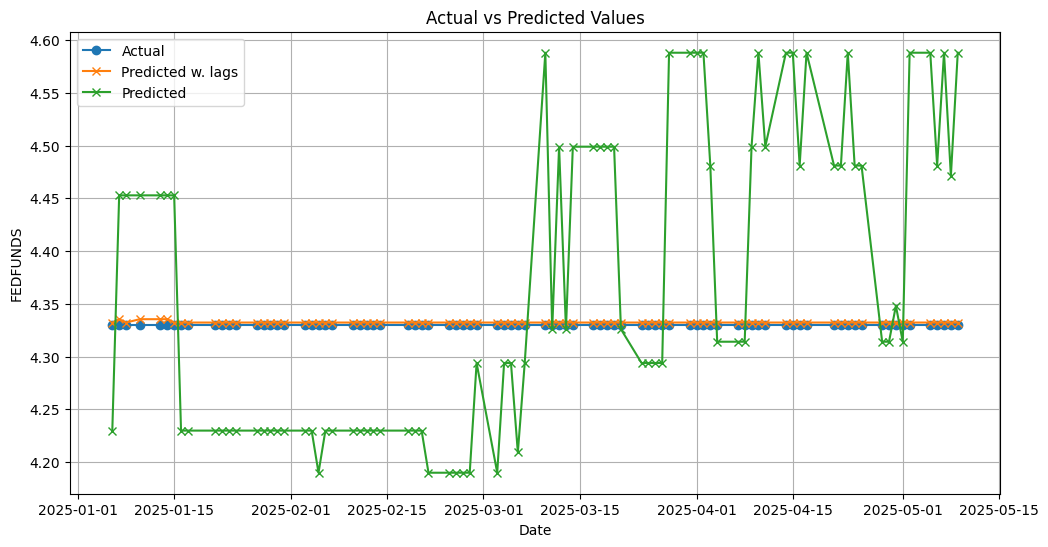

In [ ]:
plt.figure(figsize=(12, 6))

# Actual
plt.plot(test_data['Date'], Y_test, label='Actual', marker='o')

# Predicted w. lags
plt.plot(test_data['Date'], y_pred_rate_time, label='Predicted w. lags', marker='x')

# Optional: trim y_pred_rate if needed
plt.plot(test_data['Date'], y_pred_rate[-len(test_data):], label='Predicted', marker='x')

plt.xlabel('Date')
plt.ylabel(target)
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


### XGBoost: stock data, FED meetings and not time series 
Testset=2024

In [148]:
split_date = pd.Timestamp('2025-01-01')

train_data = df[df['Date'] < split_date]
test_data = df[df['Date'] >= split_date]

target = 'FEDFUNDS'

In [151]:
# Create future-shifted target
train_data['target_t_plus_1'] = train_data[target].shift(-1)

# Drop rows with NaN in shifted target BEFORE splitting
#train_data = train_data.dropna(subset=['target_t_plus_1'])

/var/folders/8c/w39xd3gn6wv4b9j9zrk1xqbw0000gn/T/ipykernel_4090/4177837032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['target_t_plus_1'] = train_data[target].shift(-1)


In [152]:
# Training/validation 80/20 split
test_split_date = pd.Timestamp('2018-01-01')

# Split into training and validation sets
train_df = train_data[train_data["Date"] < test_split_date]
val_df = train_data[train_data["Date"] >= test_split_date]

# Define features and target
feature_cols = [col for col in train_data.columns if col not in ["Date", target]]

# Datasplit
X_train = train_df[feature_cols]
y_train = train_df[target]

X_val = val_df[feature_cols]
y_val = val_df[target]

# Model input
# Create DMatrices for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_val, label=y_val)


Mean Absolute Error: 0.0596
Relative MAE: 0.0256
Time used by XGBoost: 7408.1 ms


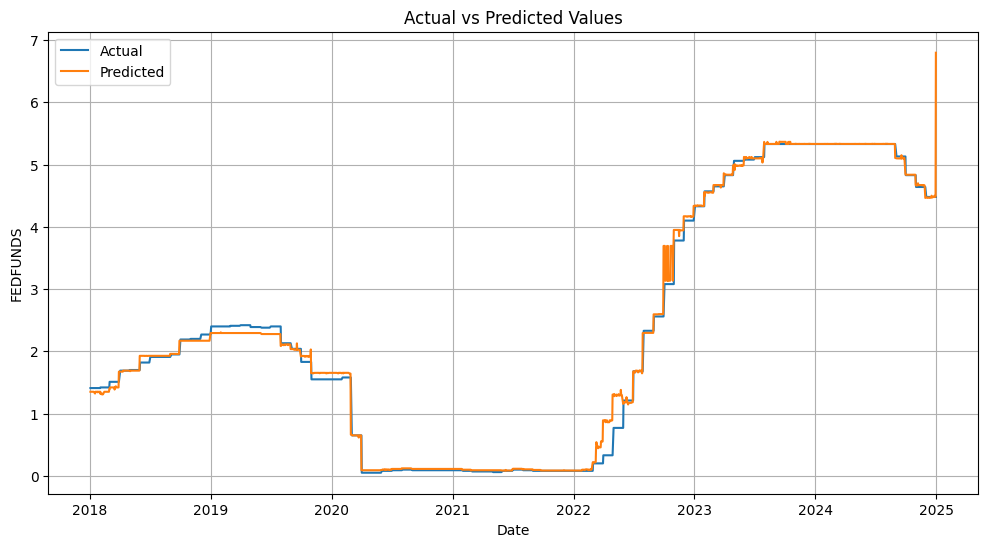

In [153]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import time
import pandas as pd

# Start timer
start = time.time()

# XGBoost parameters
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'eval_metric': 'mae',
    'verbosity': 0
}

evals = [(dtrain, 'train'), (dvalid, 'eval')]

# Train model with early stopping
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=False
)

# Predict and evaluate
y_pred_rate = xgb_model.predict(dvalid, iteration_range=(0, xgb_model.best_iteration + 1))
mae = mean_absolute_error(y_val, y_pred_rate)
relative_mae = mae / abs(y_val).mean()

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Relative MAE: {relative_mae:.4f}")
print(f"Time used by XGBoost: {(time.time() - start) * 1000:.1f} ms")
import matplotlib.pyplot as plt

# Assuming you still have test_data_clean (with dropped NAs) and predictions y_pred
# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(val_df['Date'], y_val, label='Actual') #, marker='o'
plt.plot(val_df['Date'], y_pred_rate, label='Predicted') # , marker='x'
#plt.plot(test_data_clean['Date'], y_pred_ZCB, label='Predicted w. ZCB data', marker='x')
#plt.plot(test_data_clean['Date'], y_pred_stock, label='Predicted w. stock data', marker='x')
plt.xlabel('Date')
plt.ylabel(target)
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


## Stock

### XGBoost: replicating
Testset=2024

In [ ]:
split_date = pd.Timestamp('2025-01-01')

train_data = df[df['Date'] < split_date]
test_data = df[df['Date'] >= split_date]

target = 'FEDFUNDS'

In [ ]:
# Create future-shifted target
train_data['target_t_plus_1'] = train_data[target].shift(-1)

# Drop rows with NaN in shifted target BEFORE splitting
#train_data = train_data.dropna(subset=['target_t_plus_1'])

/var/folders/8c/w39xd3gn6wv4b9j9zrk1xqbw0000gn/T/ipykernel_4090/4177837032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['target_t_plus_1'] = train_data[target].shift(-1)


In [ ]:
# Training/validation 80/20 split
test_split_date = pd.Timestamp('2018-01-01')

# Split into training and validation sets
train_df = train_data[train_data["Date"] < test_split_date]
val_df = train_data[train_data["Date"] >= test_split_date]

# Define features and target
feature_cols = [col for col in train_data.columns if col not in ["Date", target]]

# Datasplit
X_train = train_df[feature_cols]
y_train = train_df[target]

X_val = val_df[feature_cols]
y_val = val_df[target]

# Model input
# Create DMatrices for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_val, label=y_val)


Mean Absolute Error: 0.0596
Relative MAE: 0.0256
Time used by XGBoost: 7408.1 ms


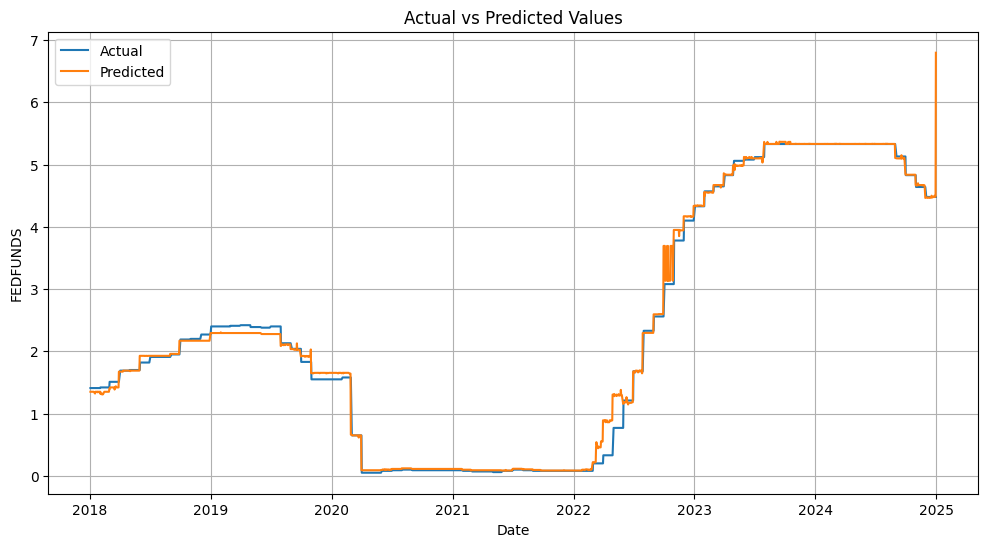

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
import time
import pandas as pd

# Start timer
start = time.time()

# XGBoost parameters
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'eval_metric': 'mae',
    'verbosity': 0
}

evals = [(dtrain, 'train'), (dvalid, 'eval')]

# Train model with early stopping
xgb_model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=False
)

# Predict and evaluate
y_pred_rate = xgb_model.predict(dvalid, iteration_range=(0, xgb_model.best_iteration + 1))
mae = mean_absolute_error(y_val, y_pred_rate)
relative_mae = mae / abs(y_val).mean()

print(f"Mean Absolute Error: {mae:.4f}")
print(f"Relative MAE: {relative_mae:.4f}")
print(f"Time used by XGBoost: {(time.time() - start) * 1000:.1f} ms")
import matplotlib.pyplot as plt

# Assuming you still have test_data_clean (with dropped NAs) and predictions y_pred
# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(val_df['Date'], y_val, label='Actual') #, marker='o'
plt.plot(val_df['Date'], y_pred_rate, label='Predicted') # , marker='x'
#plt.plot(test_data_clean['Date'], y_pred_ZCB, label='Predicted w. ZCB data', marker='x')
#plt.plot(test_data_clean['Date'], y_pred_stock, label='Predicted w. stock data', marker='x')
plt.xlabel('Date')
plt.ylabel(target)
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


## Political influence


In [82]:
us_presidents = pd.read_csv("US_presidents.csv")
us_presidents['Date'] = pd.to_datetime(us_presidents['Date'])

# Merge df2 onto df1 using a left join (e.g., on "Date")
df_politics = pd.merge(df, us_presidents, on="Date", how="left")

# Convert 'Party' column to numeric (e.g., Republican=0, Democratic=1)
df_politics['Party'] = df_politics['Party'].map({'Republican': 0, 'Democratic': 1})

['Date', 'SVENY01', 'SVENY02', 'SVENY03', 'SVENY04', 'SVENY05', 'SVENY06', 'SVENY07', 'SVENY08', 'SVENY09', 'SVENY10', 'SVENY11', 'SVENY12', 'SVENY13', 'SVENY14', 'SVENY15', 'SVENY16', 'SVENY17', 'SVENY18', 'SVENY19', 'SVENY20', 'Close', 'High', 'Low', 'Open', 'Volume', 'FEDFUNDS', 'Notes', 'Rate Change (bps)', 'Party']


In [83]:
split_date = pd.Timestamp('2025-01-01')

train_data = df_politics[df_politics['Date'] < split_date]
test_data = df_politics[df_politics['Date'] >= split_date]


In [85]:
#FEDFUNDS
import pandas as pd
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler


feature_cols = [col for col in train_data.columns if col not in ["Date", "FEDFUNDS"]]  # Exclude non-numeric/date

X = train_data[feature_cols]
y = train_data["FEDFUNDS"]

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

# Optional: scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Convert to LightGBM Dataset format
train_set = lgb.Dataset(X_train, label=y_train)
val_set = lgb.Dataset(X_val, label=y_val)

# Define parameters
params = {
    "objective": "regression",
    "metric": "mae",
    "verbosity": -1,
    "boosting_type": "gbdt"
}

# Train model
model_interest_rate = lgb.train(
    params,
    train_set,
    num_boost_round=1000,
    valid_sets=[train_set, val_set],
    callbacks=[
        early_stopping(stopping_rounds=20),
        log_evaluation(50)  # Logs every 50 rounds
    ]
)

# Predict and evaluate
y_pred = model_interest_rate.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")


Training until validation scores don't improve for 20 rounds
[50]	training's l1: 0.0575473	valid_1's l1: 0.512673
[100]	training's l1: 0.040015	valid_1's l1: 0.497788
Early stopping, best iteration is:
[98]	training's l1: 0.0404041	valid_1's l1: 0.4969
Mean Absolute Error: 0.4969


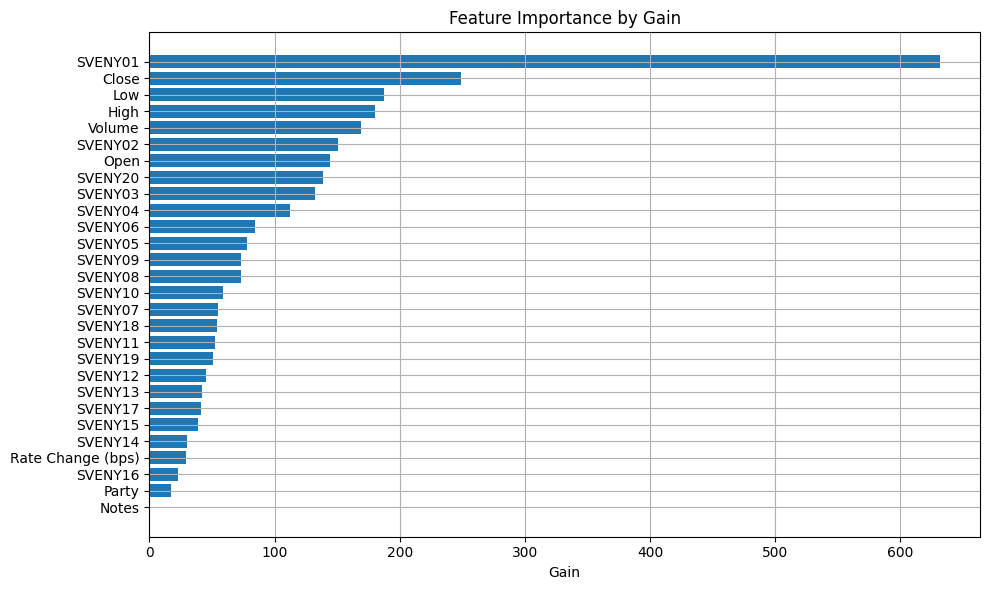

In [88]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature names
feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"f{i}" for i in range(X.shape[1])]

# Get feature importance by gain
importances_interest_rate = model_interest_rate.feature_importance(importance_type='split')

# Sort by importance
indices_interest_rate = np.argsort(importances_interest_rate)[::-1]
sorted_features_interest_rate = [feature_names[i] for i in indices_interest_rate]
sorted_importances_interest_rate = importances_interest_rate[indices_interest_rate]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features_interest_rate[::-1], sorted_importances_interest_rate[::-1])
plt.xlabel("Gain")
plt.title("Feature Importance by Gain")
plt.grid(True)
plt.tight_layout()
plt.show()

In [89]:
#Stock data
import pandas as pd
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler


feature_cols = [col for col in train_data.columns if col not in ["Date", "Close", "High", "Low", "Open", "Volume"]]  # Exclude non-numeric/date

X = train_data[feature_cols]
y = train_data["Close"]

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

# Optional: scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Convert to LightGBM Dataset format
train_set = lgb.Dataset(X_train, label=y_train)
val_set = lgb.Dataset(X_val, label=y_val)

# Define parameters
params = {
    "objective": "regression",
    "metric": "mae",
    "verbosity": -1,
    "boosting_type": "gbdt"
}

# Train model
model_stock = lgb.train(
    params,
    train_set,
    num_boost_round=1000,
    valid_sets=[train_set, val_set],
    callbacks=[
        early_stopping(stopping_rounds=20),
        log_evaluation(50)  # Logs every 50 rounds
    ]
)

# Predict and evaluate
y_pred = model_stock.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")


Training until validation scores don't improve for 20 rounds
[50]	training's l1: 28.616	valid_1's l1: 1994.81
Early stopping, best iteration is:
[65]	training's l1: 25.289	valid_1's l1: 1991.46
Mean Absolute Error: 1991.4632


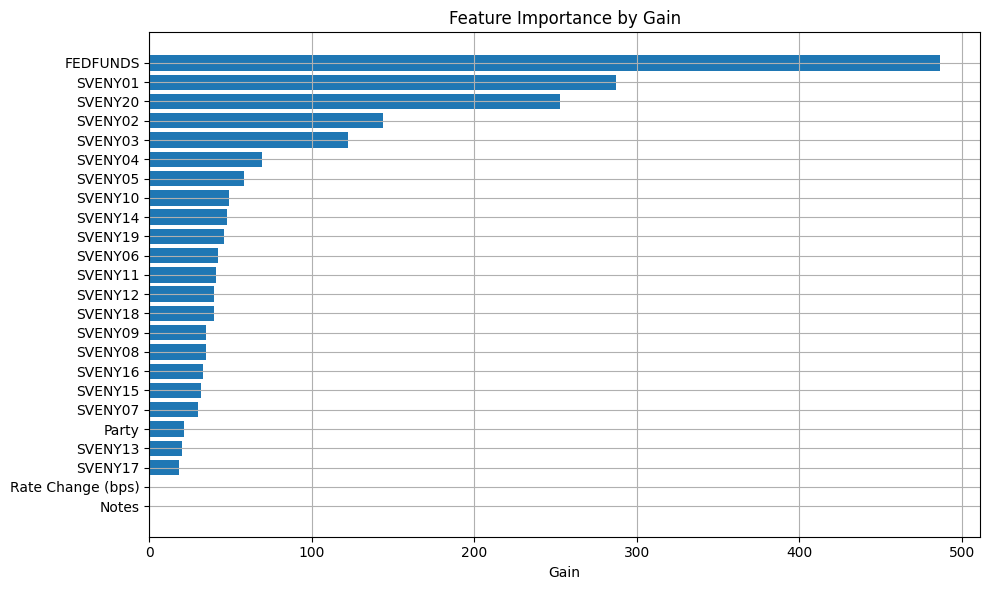

In [90]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature names
feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"f{i}" for i in range(X.shape[1])]

# Get feature importance by gain
importances_stock = model_stock.feature_importance(importance_type='split')

# Sort by importance
indices_stock = np.argsort(importances_stock)[::-1]
sorted_features_stock = [feature_names[i] for i in indices_stock]
sorted_importances_stock = importances_stock[indices_stock]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features_stock[::-1], sorted_importances_stock[::-1])
plt.xlabel("Gain")
plt.title("Feature Importance by Gain")
plt.grid(True)
plt.tight_layout()
plt.show()

In [93]:
#Decisions
import pandas as pd
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler


feature_cols = [col for col in train_data.columns if col not in ["Date", "Rate Change (bps)"]]  # Exclude non-numeric/date

X = train_data[feature_cols]
y = train_data["Rate Change (bps)"]

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

# Optional: scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Convert to LightGBM Dataset format
train_set = lgb.Dataset(X_train, label=y_train)
val_set = lgb.Dataset(X_val, label=y_val)

# Define parameters
params = {
    "objective": "regression",
    "metric": "mae",
    "verbosity": -1,
    "boosting_type": "gbdt"
}

# Train model
model_decisions = lgb.train(
    params,
    train_set,
    num_boost_round=1000,
    valid_sets=[train_set, val_set],
    callbacks=[
        early_stopping(stopping_rounds=20),
        log_evaluation(50)  # Logs every 50 rounds
    ]
)

# Predict and evaluate
y_pred = model_decisions.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[1]	training's l1: 0.454217	valid_1's l1: 0.662409
Mean Absolute Error: 0.6624


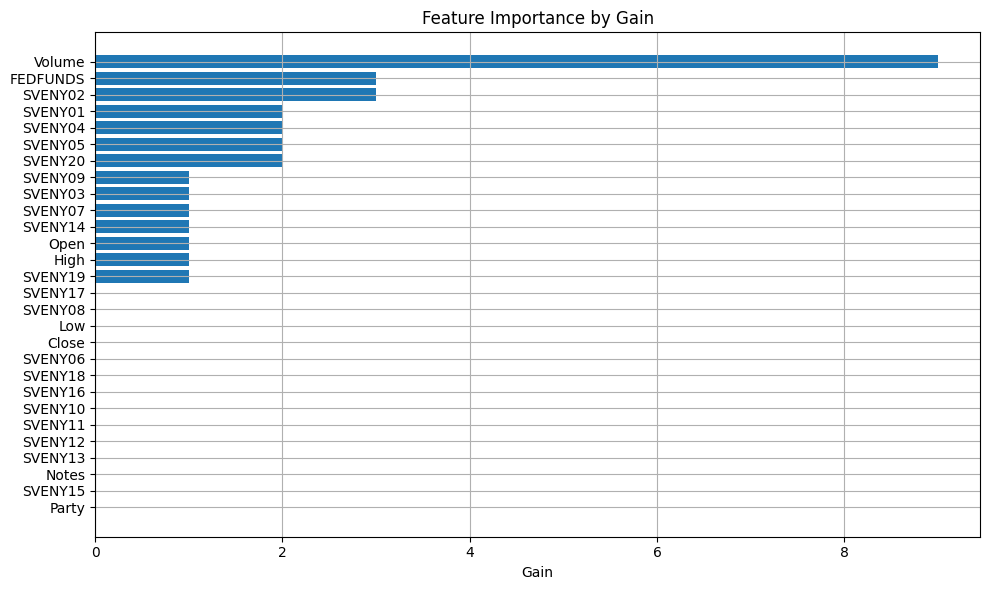

In [94]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature names
feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"f{i}" for i in range(X.shape[1])]

# Get feature importance by gain
importances_decisions = model_decisions.feature_importance(importance_type='split')

# Sort by importance
indices_decisions = np.argsort(importances_decisions)[::-1]
sorted_features_decisions = [feature_names[i] for i in indices_decisions]
sorted_importances_decisions = importances_decisions[indices_decisions]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features_decisions[::-1], sorted_importances_decisions[::-1])
plt.xlabel("Gain")
plt.title("Feature Importance by Gain")
plt.grid(True)
plt.tight_layout()
plt.show()

In [95]:
#emergency
import pandas as pd
import lightgbm as lgb
from lightgbm import early_stopping, log_evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler


feature_cols = [col for col in train_data.columns if col not in ["Date", "Notes"]]  # Exclude non-numeric/date

X = train_data[feature_cols]
y = train_data["Notes"]

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

# Optional: scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Convert to LightGBM Dataset format
train_set = lgb.Dataset(X_train, label=y_train)
val_set = lgb.Dataset(X_val, label=y_val)

# Define parameters
params = {
    "objective": "regression",
    "metric": "mae",
    "verbosity": -1,
    "boosting_type": "gbdt"
}

# Train model
model_emergency = lgb.train(
    params,
    train_set,
    num_boost_round=1000,
    valid_sets=[train_set, val_set],
    callbacks=[
        early_stopping(stopping_rounds=20),
        log_evaluation(50)  # Logs every 50 rounds
    ]
)

# Predict and evaluate
y_pred = model_emergency.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
print(f"Mean Absolute Error: {mae:.4f}")


Training until validation scores don't improve for 20 rounds
Early stopping, best iteration is:
[22]	training's l1: 0.00222873	valid_1's l1: 0.00209488
Mean Absolute Error: 0.0021
